In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,10

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape')
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


,X,y
0,-17.8,322.0
1,-17.5,145.5
2,-17.4,64.0
3,-16.9,36.0
4,-16.5,96.0
...,...,...
541,38.0,1184.0
542,38.7,475.0
543,39.0,1033.0
544,39.3,531.0


,X,y
0,0,541.460274
1,1,426.183562
2,2,301.630137
3,3,203.331507
4,4,132.591781
5,5,139.082192
6,6,287.564384
7,7,606.005479
8,8,1015.701370
9,9,645.983562


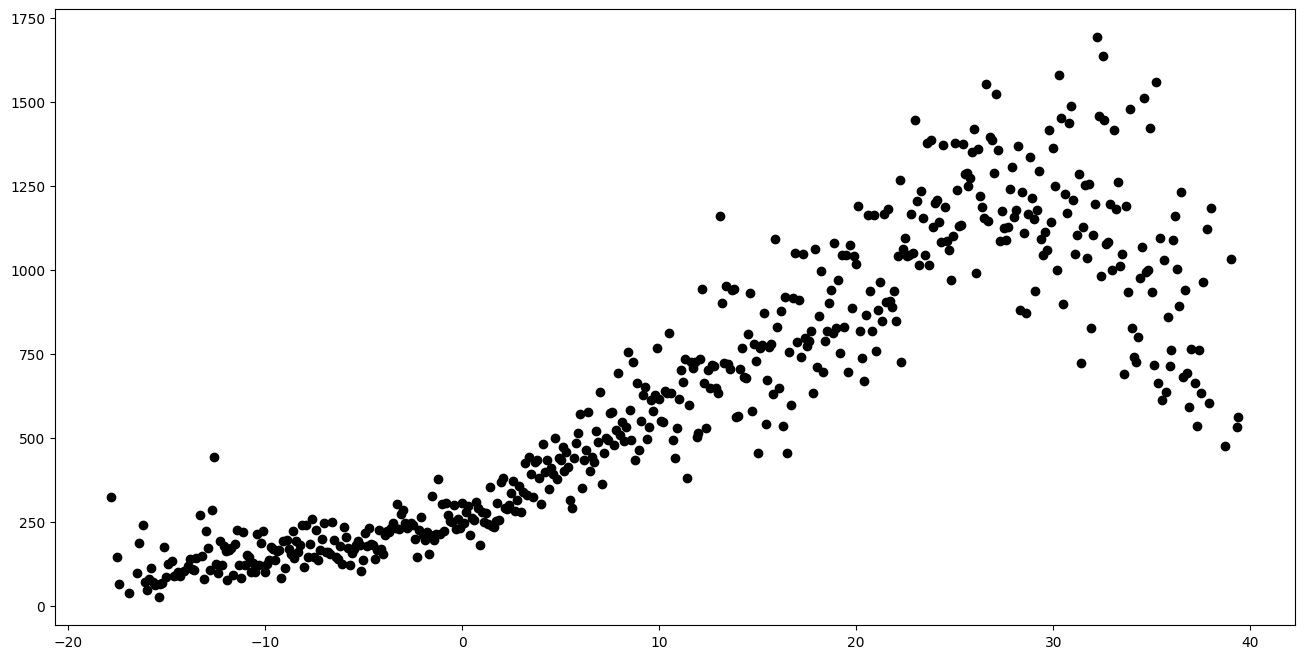

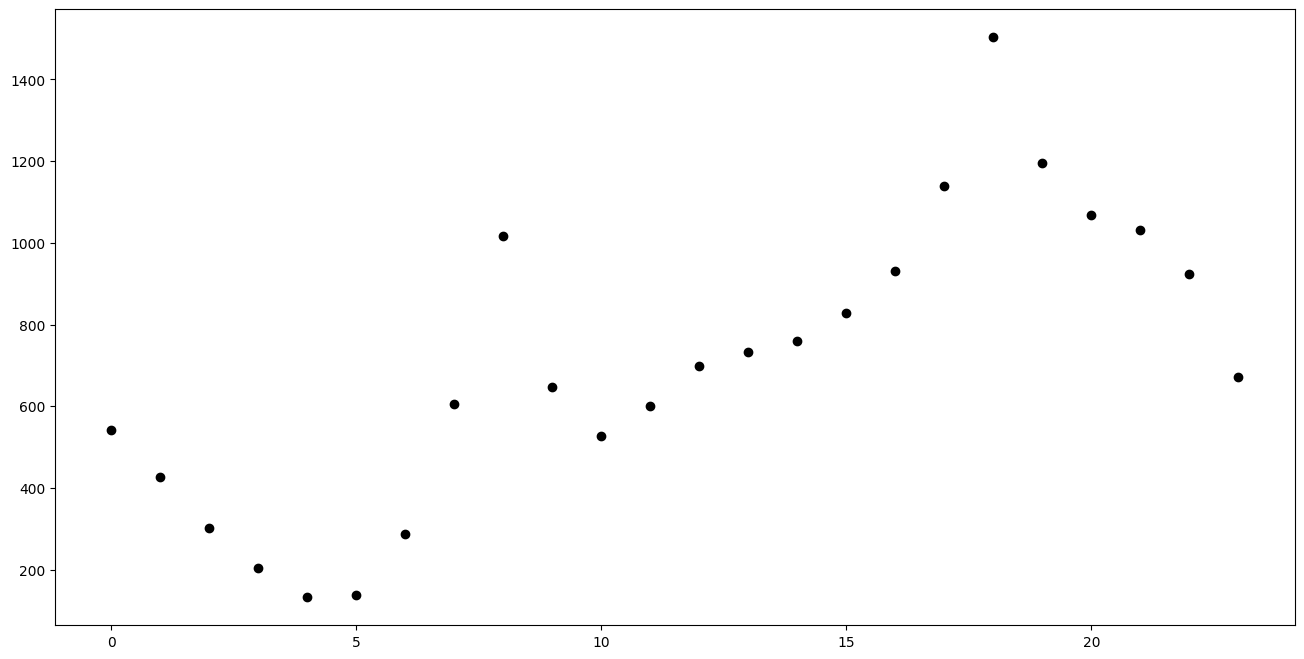

In [3]:
def cut_dataFrame(colname):
    data = df[['Rented Bike Count', colname]].copy()
    data = data.groupby(colname, as_index=False).mean()
    data.columns = ['X', 'y']
    display(data)
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data['X'],
        data['y'],
        c='black'
    )
    return data

dataTemp = cut_dataFrame('Temperature(°C)')
dataHour = cut_dataFrame('Hour')

In [4]:
def format_data(data):
    for i in range(2,16):
        colname = 'X_{}'.format(i)
        data.loc[:, colname] = data['X']**i
    print("Shape:", data.shape)
    return data

format_data(dataTemp)
format_data(dataHour)

Shape: (546, 16)
Shape: (24, 16)


,X,y,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,541.460274,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,426.183562,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,301.630137,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768
3,3,203.331507,9,27,81,243,729,2187,6561,19683,59049,177147,531441,1594323,4782969,14348907
4,4,132.591781,16,64,256,1024,4096,16384,65536,262144,1048576,4194304,16777216,67108864,268435456,1073741824
5,5,139.082192,25,125,625,3125,15625,78125,390625,1953125,9765625,48828125,244140625,1220703125,6103515625,30517578125
6,6,287.564384,36,216,1296,7776,46656,279936,1679616,10077696,60466176,362797056,2176782336,13060694016,78364164096,470184984576
7,7,606.005479,49,343,2401,16807,117649,823543,5764801,40353607,282475249,1977326743,13841287201,96889010407,678223072849,4747561509943
8,8,1015.701370,64,512,4096,32768,262144,2097152,16777216,134217728,1073741824,8589934592,68719476736,549755813888,4398046511104,35184372088832
9,9,645.983562,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401,31381059609,282429536481,2541865828329,22876792454961,205891132094649


# Linear Regression
Tecnica statistica che cerca di modellare la relazione tra una variabile dipendente e una o più variabili indipendenti attraverso una relazione lineare. Questo è espressamente utile quando si desidera comprendere il comportamento di una variabile risposta in base a una o più variabili predittive.

**Codice:** Funzione che esegue una regressione lineare sul dataset _data_, consentendo al modello di avere un grado di polinomio specificato da _power_. La funzione restituisce il risultato della regressione lineare in un formato predefinito, inclusi l'**RSS** _(Residual Sum of Squares)_, l'**intercetta** e i **coefficienti dei predittori**. 

In [5]:
from sklearn.linear_model import LinearRegression
from math import sqrt
def linear_regression_execution(data, power, models_to_plot):
    # Initialize predictors:
    predictors = ['X']
    if power >= 2:
        predictors.extend(['X_{}'.format(i) for i in range(2, power+1)])
    
    # Fit the model:
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[predictors])
    linreg = LinearRegression()
    linreg.fit(data_scaled, data['y'])
    y_pred = linreg.predict(data_scaled)

    #Check if a plot is to be made for the entered power:
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['X'], data['y'], '.')
        plt.plot(data['X'], y_pred)
        plt.title('Plot for power: {}'.format(power))

    #Return the result in pre-defined format:
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([sqrt(rss / len(data))])
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

In [6]:
def linear_regression(data):
    col = ['rss', 'rmse','intercept'] + ['coeff_X_{}'.format(i) for i in range(1,16)]
    ind = ['model_pow_{}'.format(i) for i in range(1,16)]
    coeff_matrix_simple = pd.DataFrame(index=ind, columns=col)
    models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
    for i in range(1,16):
        coeff_matrix_simple.iloc[i-1, 0:i+3] = linear_regression_execution(data, i, models_to_plot)
    pd.options.display.float_format = '{:,.5g}'.format
    display(coeff_matrix_simple)

,rss,rmse,intercept,coeff_X_1,coeff_X_2,coeff_X_3,coeff_X_4,coeff_X_5,coeff_X_6,coeff_X_7,coeff_X_8,coeff_X_9,coeff_X_10,coeff_X_11,coeff_X_12,coeff_X_13,coeff_X_14,coeff_X_15
model_pow_1,2.1166e+07,196.89,632.29,365.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,2.0669e+07,194.56,632.29,411.32,-54.966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.2306e+07,150.13,632.29,473.65,459.69,-581.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.0579e+07,139.2,632.29,297.31,438.62,213.89,-634.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.0476e+07,138.52,632.29,326.64,307.73,119.74,-54.033,-386.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,1.0476e+07,138.52,632.29,327.57,311.89,107.69,-67.479,-341,-25.505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,1.0331e+07,137.55,632.29,410.21,224.03,-873.71,"1,431","2,224.1","-5,932.9","2,838.3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,1.0159e+07,136.41,632.29,391.21,656.99,-895.91,"-2,962.3","6,368.7","4,540.4","-15,536","7,763.6",NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,1.0104e+07,136.04,632.29,446.47,803.52,"-2,131.5","-3,848.2","15,851",-539.39,"-36,373","37,298","-11,179",NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,1.0086e+07,135.91,632.29,412.98,940.37,"-1,403.4","-6,601.1","11,937","18,590","-40,936","-2,992.6","36,862","-16,483",NaN,NaN,NaN,NaN,NaN


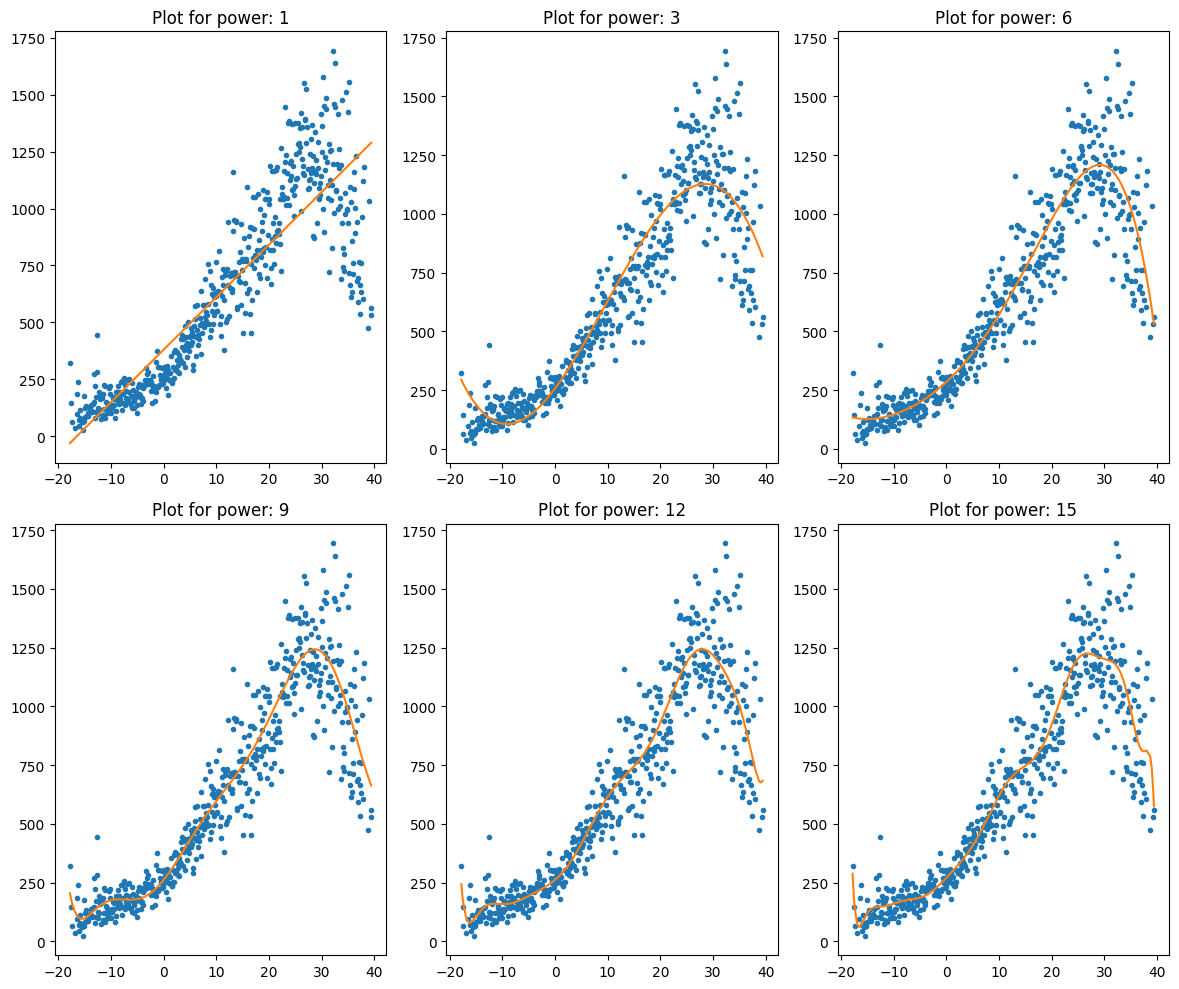

In [7]:
linear_regression(dataTemp)

,rss,rmse,intercept,coeff_X_1,coeff_X_2,coeff_X_3,coeff_X_4,coeff_X_5,coeff_X_6,coeff_X_7,coeff_X_8,coeff_X_9,coeff_X_10,coeff_X_11,coeff_X_12,coeff_X_13,coeff_X_14,coeff_X_15
model_pow_1,1.2353e+06,226.87,704.6,264.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,1.2056e+06,224.13,704.6,395.7,-135.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,7.3773e+05,175.32,704.6,-767.84,"2,941.1","-1,981.2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,7.2669e+05,174.01,704.6,-452.77,"1,399.5",366.46,"-1,124.3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,5.2965e+05,148.56,704.6,"-2,494.7","17,455","-42,205","45,186","-17,783",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,5.0505e+05,145.06,704.6,"-3,509.2","29,265","-89,948",1.326e+05,"-92,147","23,898",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,3.4017e+05,119.05,704.6,-4.0211,"-27,834",2.3569e+05,-7.5008e+05,1.1447e+06,-8.4175e+05,2.395e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,2.9652e+05,111.15,704.6,"2,345.1","-79,055",6.2625e+05,-2.2047e+06,4.1047e+06,-4.2031e+06,2.2399e+06,-4.8617e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,2.7708e+05,107.45,704.6,302.4,"-21,750","65,762",5.2105e+05,-3.387e+06,7.986e+06,-9.3983e+06,5.5406e+06,-1.3065e+06,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,2.7435e+05,106.92,704.6,-720.03,"13,781",-3.6471e+05,3.1509e+06,-1.2683e+07,2.8167e+07,-3.6728e+07,2.8052e+07,-1.1627e+07,2.0195e+06,NaN,NaN,NaN,NaN,NaN


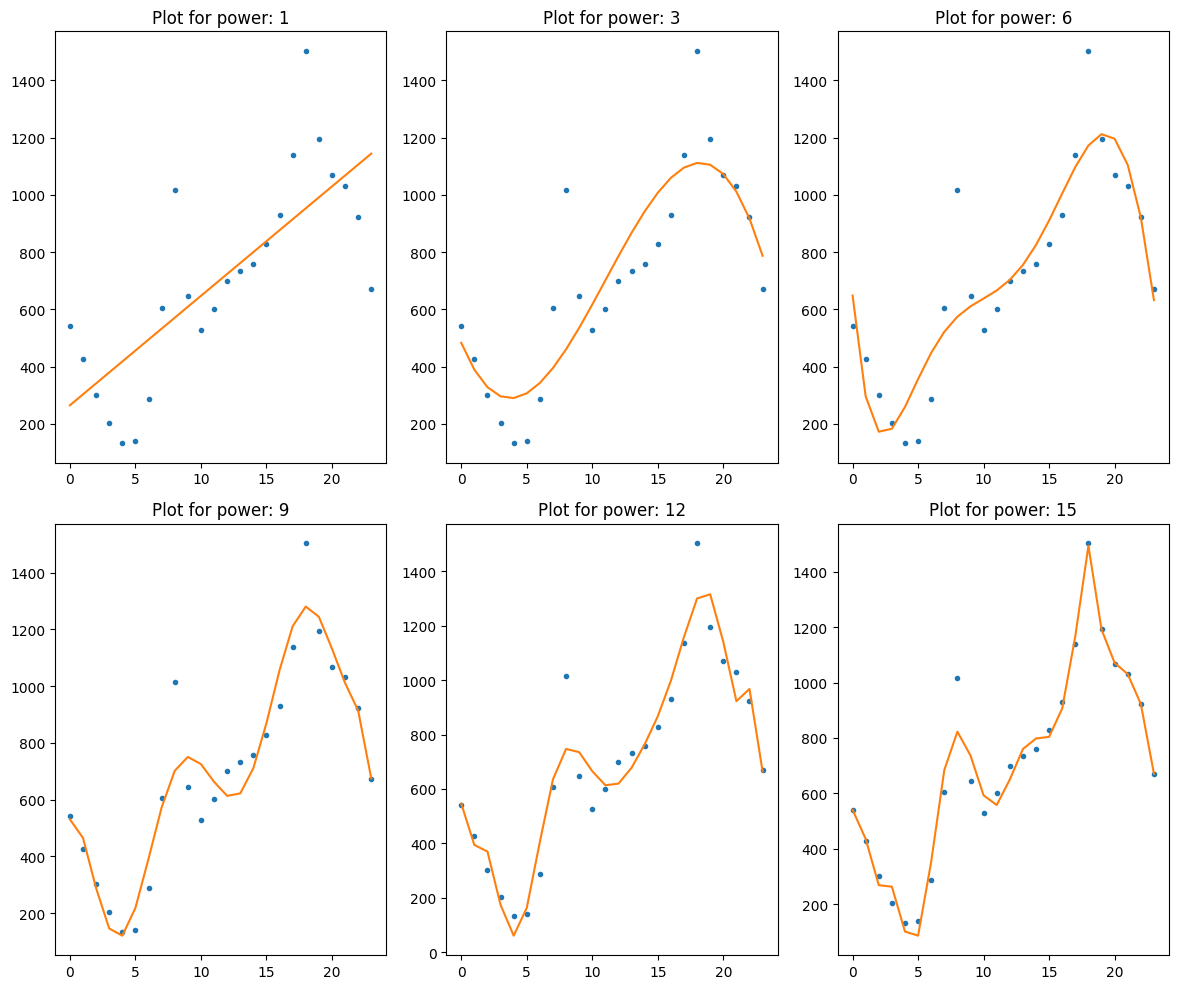

In [8]:
linear_regression(dataHour)

# Ridge Regression
Tecnica di regressione lineare regolarizzata che aggiunge un termine di regolarizzazione L2 alla funzione obiettivo. Questo termine di regolarizzazione aiutà a ridurre la complessità del modello impedendo ai coefficienti dei predittori di diventare troppo grandi, prevenendo l'overfitting.

**Codice:** Funzione che implementa la regressione Ridge sul dataset _data_, utilizzando i predittori specificati. La variabile _alpha_ rappresenta il parametro di regolarizzazione, che controlla il grado di regolarizzazione applicato al modello. La funzione restituisce il risultato della regressione Ridge in un formato predefinito, incluso l'**RSS** _(Residual Sum of Squares)_, l'**intercetta** e i **coefficienti dei predittori**.

In [9]:
from sklearn.linear_model import Ridge
def ridge_regression_execution(data, predictors, alpha, models_to_plot):
    #Fit the model
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[predictors])
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data_scaled, data['y'])
    y_pred = ridgereg.predict(data_scaled)

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['X'],data['y'],'.')
        plt.plot(data['X'],y_pred)
        plt.title('Plot for alpha: {}'.format(alpha))
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([sqrt(rss / len(data))])
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [10]:
def ridge_regression(data):
    #Initialize predictors to be set of 15 powers of x
    predictors=['X']
    predictors.extend(['X_{}'.format(i) for i in range(2,16)])
    
    #Set the different values of alpha to be tested
    alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
    #Initialize the dataframe for storing coefficients.
    col = ['rss', 'rmse','intercept'] + ['coef_X_{}'.format(i) for i in range(1,16)]
    ind = ['alpha_{}'.format(alpha_ridge[i]) for i in range(0,10)]
    coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
    
    models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
    for i in range(10):
        coef_matrix_ridge.iloc[i,] = ridge_regression_execution(data, predictors, alpha_ridge[i], models_to_plot)
    pd.options.display.float_format = '{:,.5g}'.format
    display(coef_matrix_ridge)
    print(coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1))

,rss,rmse,intercept,coef_X_1,coef_X_2,coef_X_3,coef_X_4,coef_X_5,coef_X_6,coef_X_7,coef_X_8,coef_X_9,coef_X_10,coef_X_11,coef_X_12,coef_X_13,coef_X_14,coef_X_15
alpha_1e-15,9.836e+06,134.22,632.29,373.46,190.42,"-1,460.3","18,083","32,860",-3.4079e+05,-1.8403e+05,2.7948e+06,-1.1262e+06,-1.0417e+07,1.2997e+07,9.5873e+06,-2.9375e+07,2.1303e+07,-5.2896e+06
alpha_1e-10,9.8713e+06,134.46,632.29,282.88,344.72,"3,327.7","8,593.3","-55,391",-1.2623e+05,4.3464e+05,7.0174e+05,-2.0236e+06,-1.7585e+06,6.1503e+06,-1.3099e+05,-9.164e+06,8.2176e+06,-2.2579e+06
alpha_1e-08,9.9589e+06,135.05,632.29,296.93,883.08,"2,893.9","-8,095.1","-44,377","74,862",2.4533e+05,-4.5014e+05,-4.0857e+05,1.0781e+06,-1.4864e+05,-3.9959e+05,-4.7942e+05,8.1555e+05,-2.7877e+05
alpha_0.0001,1.0111e+07,136.08,632.29,396.06,689.44,-846.54,"-3,469.9","5,183.3","7,750.9","-10,940","-1,077","-3,268.2","4,168.1","2,698.4","1,984.8","-1,466.4","-2,208.1",728.31
alpha_0.001,1.0171e+07,136.48,632.29,393.21,486.34,-664.84,"-1,330.2","2,608.7","2,039.9","-2,307.6","-1,268","-1,797",84.181,734.28,"1,425.5","1,068.5",190.24,"-1,340.8"
alpha_0.01,1.0243e+07,136.97,632.29,371.53,354.68,-372.94,-313.97,"1,162.1",14.748,-388.49,-631.45,-505.22,-149.91,184.78,421.11,420.68,157.86,-403.43
alpha_1,1.0331e+07,137.56,632.29,334.89,273.4,7.1685,10.27,-38.234,-67.48,-87.887,-91.2,-81.819,-61.601,-35.339,-5.5434,24.904,54.454,81.762
alpha_5,1.0404e+07,138.04,632.29,326.79,245.24,48.512,2.7108,-52.481,-71.725,-82.447,-78.39,-67.333,-49.782,-28.897,-5.7753,18.151,42.156,65.587
alpha_10,1.055e+07,139.01,632.29,322.52,220.93,59.551,3.5499,-46.338,-65.533,-74.642,-71.129,-61.278,-46.03,-27.895,-7.8601,12.951,33.932,54.564
alpha_20,1.0928e+07,141.47,632.29,314.16,189.77,67.538,7.0327,-34.945,-54.203,-62.481,-60.759,-53.327,-41.533,-27.226,-11.314,5.3465,22.244,38.971


alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int32


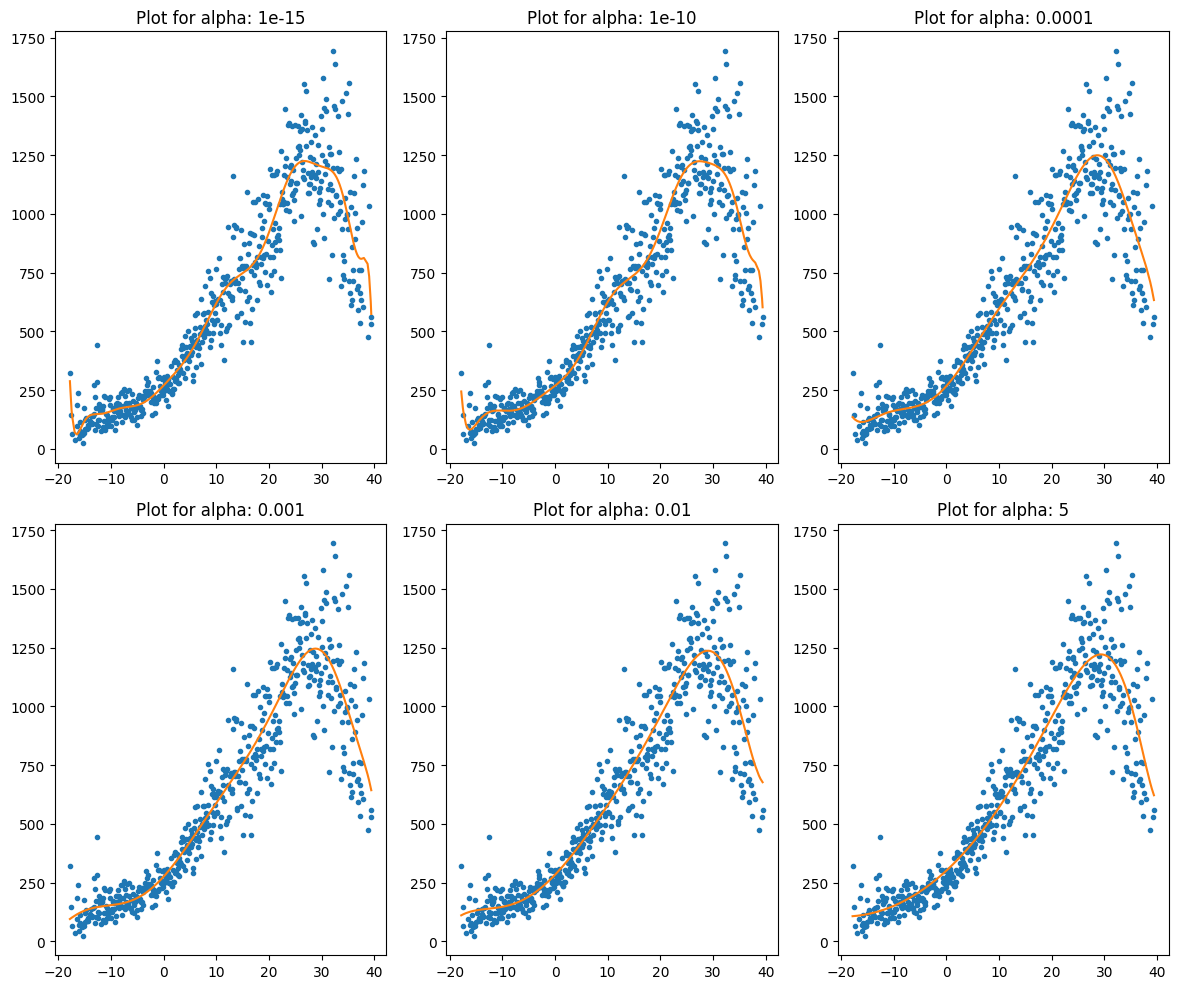

In [11]:
ridge_regression(dataTemp)

C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.4499e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,rss,rmse,intercept,coef_X_1,coef_X_2,coef_X_3,coef_X_4,coef_X_5,coef_X_6,coef_X_7,coef_X_8,coef_X_9,coef_X_10,coef_X_11,coef_X_12,coef_X_13,coef_X_14,coef_X_15
alpha_1e-15,1.0258e+05,65.379,704.6,"-1,503.4",98.84,6.5886e+05,-1.1905e+07,9.1925e+07,-3.8171e+08,9.1729e+08,-1.2432e+09,7.1071e+08,3.8582e+08,-9.0998e+08,5.689e+08,-1.2856e+08,"-1,342.4",125.54
alpha_1e-10,2.1195e+05,93.975,704.6,"1,050.4","-40,713",2.3366e+05,-2.4491e+05,-1.1562e+06,3.147e+06,-1.5524e+06,-2.2436e+06,1.1721e+06,2.0079e+06,-4.8732e+05,-1.6758e+06,8.3933e+05,-114.09,151.87
alpha_1e-08,2.2886e+05,97.652,704.6,297.86,"-30,607",2.222e+05,-5.504e+05,4.1707e+05,2.5576e+05,-2.6285e+05,-2.728e+05,"50,828",2.2458e+05,"80,036",-1.432e+05,"9,065",-243.62,129.49
alpha_0.0001,3.3532e+05,118.2,704.6,"-1,742.9","8,967.3","-9,518.9","-4,472.7","3,520.5","5,593.9","3,302",6.9064,"-2,235.7","-2,817.5","-1,978.1",-280.05,"1,694.7",-127.78,150.1
alpha_0.001,3.974e+05,128.68,704.6,-928.79,"4,357.8","-3,065","-2,675.8",-160.42,"1,479.9","1,877.6","1,483",764.24,17.225,-617.35,"-1,096.6","-1,428.5",-188,167.13
alpha_0.01,5.2566e+05,148,704.6,-174.48,"1,176.6",-563.12,-667.19,-136.39,335.9,555.24,541.55,369.29,108.44,-189.91,-492.83,-781,-98.786,114.06
alpha_1,6.3369e+05,162.49,704.6,101.66,147.51,115.72,86.714,60.448,34.114,7.6751,-17.839,-41.446,-62.533,-80.849,-96.401,-109.35,-20.72,64.585
alpha_5,7.346e+05,174.95,704.6,123.57,115.17,85.684,58.133,34.216,13.536,-4.2335,-19.325,-31.976,-42.445,-51.004,-57.92,-63.442,4.6344,40.096
alpha_10,8.6187e+05,189.5,704.6,111.45,95.891,69.972,46.756,27.136,10.662,-3.1107,-14.548,-23.972,-31.676,-37.926,-42.958,-46.975,14.322,26.933
alpha_20,1.086e+06,212.72,704.6,88.918,73.972,54.073,36.619,22.044,9.9542,-0.045413,-8.2872,-15.053,-20.583,-25.087,-28.741,-31.693,19.947,14.905


alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int32


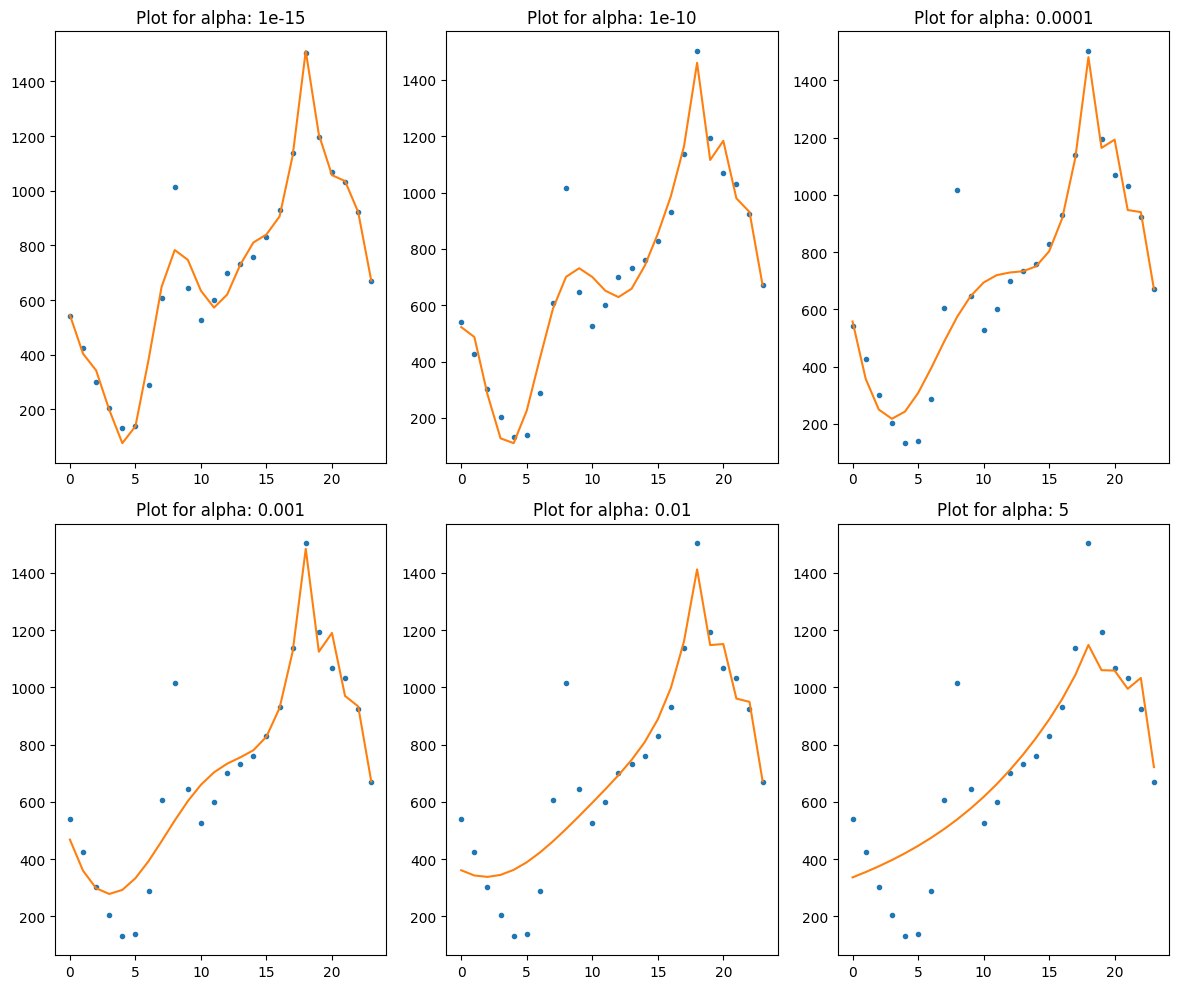

In [12]:
ridge_regression(dataHour)

# Lasso Regression
La regressione Lasso è una tecnica di regressione lineare regolarizzata che aggiunge un termine di regolarizzazione L1 alla funzione obiettivo. Questo termine di regolarizzazione aiuta a ridurre la complessità del modello e a selezionare automaticamente un sottoinsieme dei predittori più rilevanti, ponendo i coefficienti dei predittori meno importanti a zero.

**Codice:** Funzione che implementa la regressione Lasso su un dataset _data_, utilizzando i predittori specificati. La variabile _alpha_ rappresenta il parametro di regolarizzazione, che controlla il grado di regolarizzazione applicato al modello. La funzione restituisce il risultato della regressione Lasso in formato predefinito, inclusi l'**RSS** _(Residual Sum of Squares)_, l'**intercetta** e i **coefficienti dei predittori**.

In [13]:
from sklearn.linear_model import Lasso
def lasso_regression_execution(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[predictors])
    lassoreg = Lasso(alpha=alpha, max_iter=100000)
    lassoreg.fit(data_scaled,data['y'])
    y_pred = lassoreg.predict(data_scaled)

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['X'],data['y'],'.')
        plt.plot(data['X'],y_pred)
        plt.title('Plot for alpha: {}'.format(alpha))

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([sqrt(rss / len(data))])
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [14]:
def lasso_regression(data):
    #Initialize predictors to all 15 powers of x
    predictors=['X']
    predictors.extend(['X_{}'.format(i) for i in range(2,16)])
    
    #Define the alpha values to test
    alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
    
    #Initialize the dataframe to store coefficients
    col = ['rss','rmse','intercept'] + ['coef_X_{}'.format(i) for i in range(1,16)]
    ind = ['alpha_{}'.format(alpha_lasso[i]) for i in range(0,10)]
    coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
    
    #Define the models to plot
    models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}
    
    #Iterate over the 10 alpha values:
    for i in range(10):
        coef_matrix_lasso.iloc[i,] = lasso_regression_execution(data, predictors, alpha_lasso[i], models_to_plot)
    pd.options.display.float_format = '{:,.5g}'.format
    display(coef_matrix_lasso)
    coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+06, tolerance: 9.406e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+06, tolerance: 9.406e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

,rss,rmse,intercept,coef_X_1,coef_X_2,coef_X_3,coef_X_4,coef_X_5,coef_X_6,coef_X_7,coef_X_8,coef_X_9,coef_X_10,coef_X_11,coef_X_12,coef_X_13,coef_X_14,coef_X_15
alpha_1e-15,1.0221e+07,136.82,632.29,410.53,369.96,-887.01,-95.013,"3,039.5","-1,627.2","-1,065.2",-651.77,-232.96,362.34,416.55,462.45,229.78,-29.337,-379
alpha_1e-10,1.0221e+07,136.82,632.29,410.53,369.96,-887.01,-95.013,"3,039.5","-1,627.2","-1,065.2",-651.77,-232.96,362.34,416.55,462.45,229.78,-29.337,-379
alpha_1e-08,1.0221e+07,136.82,632.29,410.53,369.96,-887.01,-95.013,"3,039.5","-1,627.2","-1,065.2",-651.77,-232.96,362.34,416.55,462.45,229.78,-29.337,-379
alpha_1e-05,1.0221e+07,136.82,632.29,410.5,369.94,-886.6,-95.182,"3,038","-1,625.9","-1,065.1",-651.56,-232.41,361.06,416.65,462.48,229.57,-28.906,-379.05
alpha_0.0001,1.0221e+07,136.82,632.29,410.22,369.81,-882.93,-96.743,"3,025","-1,613.8","-1,063.9",-649.74,-227.54,349.53,417.57,462.74,227.71,-24.482,-379.95
alpha_0.001,1.0221e+07,136.82,632.29,407.26,368.48,-844.22,-111.55,"2,887.8","-1,494.4","-1,045.4",-630.17,-176.27,233.07,428.17,464.96,208.14,-0,-372.48
alpha_0.01,1.0248e+07,137,632.29,377.3,347.66,-453.89,-190.53,"1,484.2",-485.62,-657.76,-525.05,-0,0,41.03,414.51,53.734,0,-82.961
alpha_1,1.0403e+07,138.03,632.29,339.01,270.02,-0,-0,-0,-104.55,-235.37,-0,-0,-0,-0,0,0,0,45.1
alpha_5,1.0965e+07,141.71,632.29,347.02,191.03,-0,-0,-0,-0,-183.63,-48.098,-0,-0,-0,-0,-0,-0,-0
alpha_10,1.1932e+07,147.83,632.29,354.33,120.39,0,-0,-0,-0,-0,-0,-172.73,-0,-0,-0,-0,-0,-0


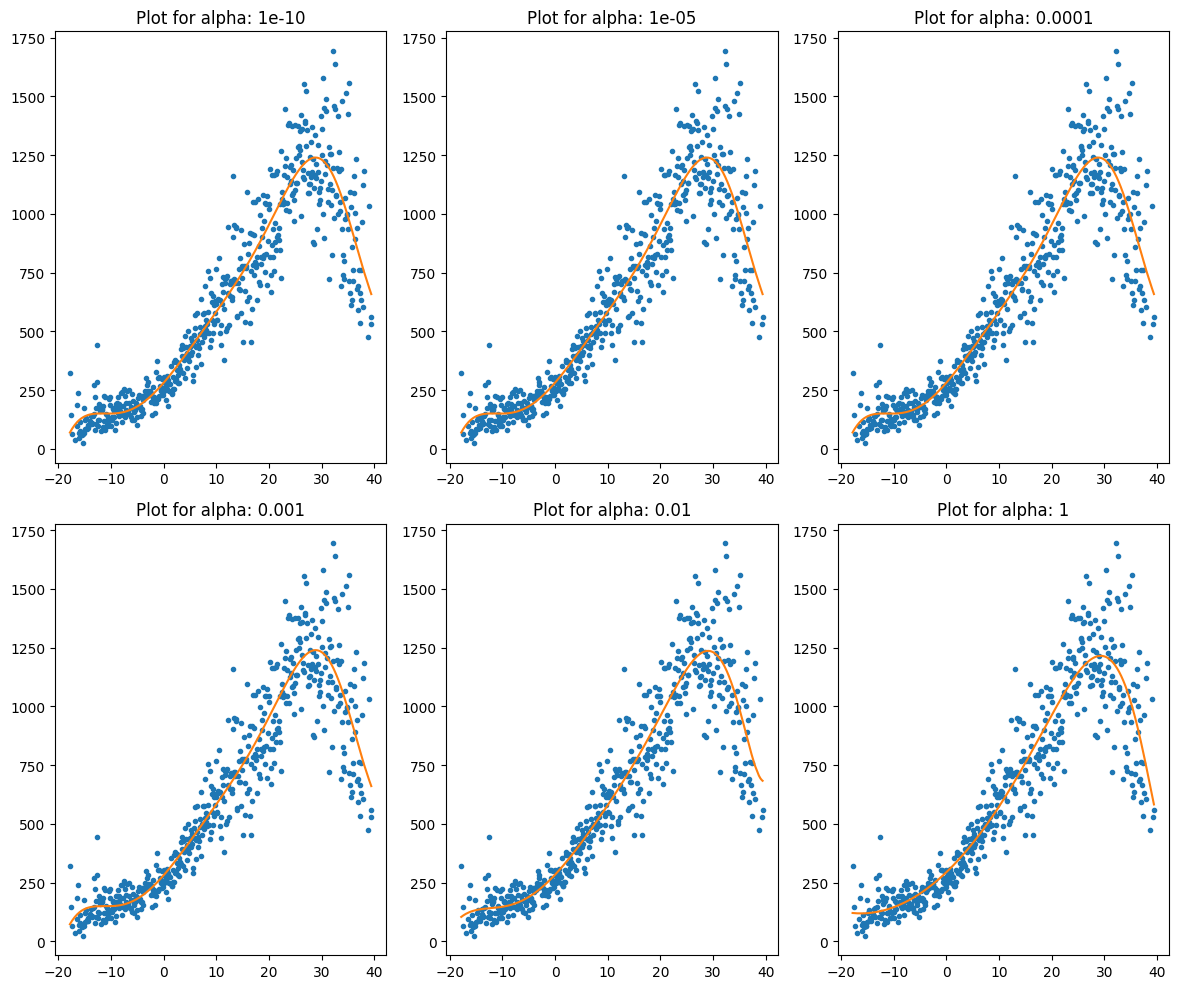

In [15]:
lasso_regression(dataTemp)

C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+05, tolerance: 2.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+05, tolerance: 2.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucar\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

,rss,rmse,intercept,coef_X_1,coef_X_2,coef_X_3,coef_X_4,coef_X_5,coef_X_6,coef_X_7,coef_X_8,coef_X_9,coef_X_10,coef_X_11,coef_X_12,coef_X_13,coef_X_14,coef_X_15
alpha_1e-15,3.3092e+05,117.42,704.6,"-1,980.7","11,124","-15,815","1,235.3","5,643.6","3,264.7",477,-962.11,"-1,262.4",-988.85,-558.43,-187.93,43.692,-137.29,150.93
alpha_1e-10,3.3092e+05,117.42,704.6,"-1,980.7","11,124","-15,815","1,235.3","5,643.6","3,264.7",477,-962.11,"-1,262.4",-988.85,-558.43,-187.93,43.692,-137.29,150.93
alpha_1e-08,3.3092e+05,117.42,704.6,"-1,980.7","11,124","-15,815","1,235.3","5,643.6","3,264.7",477,-962.11,"-1,262.4",-988.85,-558.43,-187.93,43.692,-137.29,150.93
alpha_1e-05,3.3093e+05,117.42,704.6,"-1,980.6","11,123","-15,813","1,234.5","5,642.8","3,264.7",476.8,-961.25,"-1,261.9",-989.09,-558.61,-188.03,43.534,-137.31,150.94
alpha_0.0001,3.3096e+05,117.43,704.6,"-1,979.8","11,117","-15,799","1,227.8","5,636.2","3,264.6",474.94,-953.49,"-1,256.9",-991.28,-560.17,-188.97,42.118,-137.42,150.99
alpha_0.001,3.3128e+05,117.49,704.6,"-1,972","11,056","-15,658","1,160.5","5,570","3,263.2",456.23,-875.53,"-1,208.5","-1,013.4",-576.18,-198.65,29.2,-138.53,151.51
alpha_0.01,3.3475e+05,118.1,704.6,"-1,886.4","10,413","-14,230",471.38,"4,964.6","3,256.2",265.1,-51.763,-975.07,"-1,087.3",-763.36,-322.76,-26.379,-146.59,155.07
alpha_1,6.0005e+05,158.12,704.6,-0,397.33,0,0,0,165.51,0,0,0,-0,-0,-0,-436.03,-42.359,79.59
alpha_5,6.2946e+05,161.95,704.6,0,435.28,0,0,0,0,-0,-0,-0,-0,-0,-0,-286.82,-13.921,59.065
alpha_10,6.689e+05,166.95,704.6,36.852,363.83,0,0,0,-0,-0,-0,-0,-0,-0,-0,-241.28,-0,45.357


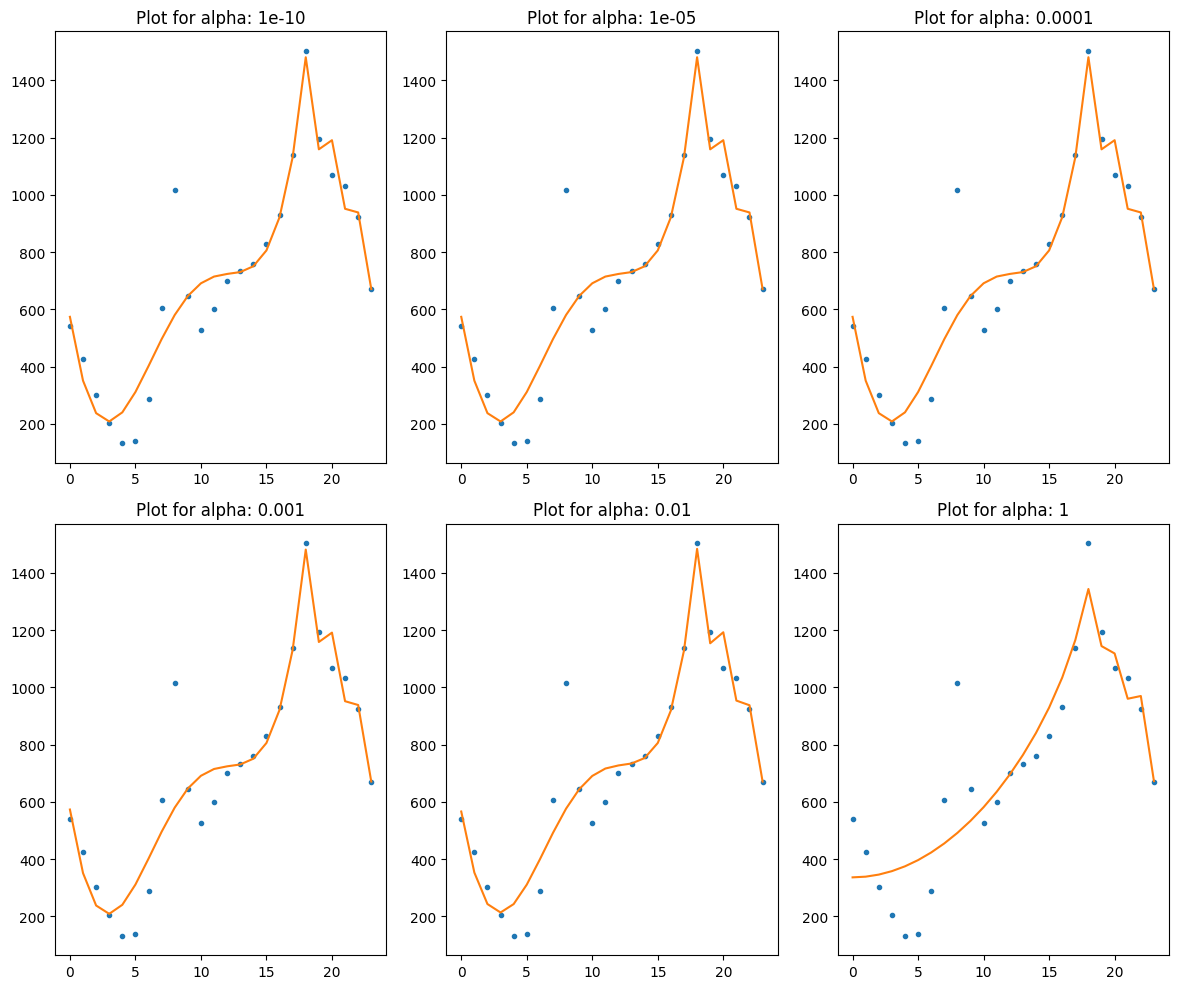

In [16]:
lasso_regression(dataHour)

In [17]:
from sklearn.preprocessing import LabelEncoder

def one_hot_encoding(data, column):
    one_hot_encoded = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, one_hot_encoded], axis=1)
    data.drop(column, axis=1, inplace=True)
    
    label_encoder = LabelEncoder()
    for col in one_hot_encoded.columns:
        data[col] = label_encoder.fit_transform(data[col])
    return data

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

def print_confusion_matrix(y_test, pred):
    cmat = confusion_matrix(y_test, pred)
    print('TP - True Negative {}'.format(cmat[0,0]))
    print('FP - False Positive {}'.format(cmat[0,1]))
    print('FN - False Negative {}'.format(cmat[1,0]))
    print('TP - True Positive {}'.format(cmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def print_roc(knn, X_test, y_test):
    label_encoder = LabelEncoder()
    y_test_binary = label_encoder.fit_transform(y_test)
    y_scores = knn.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test_binary, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of kNN')
    plt.show()

# K-Nearest Neighbors (KNN)
Il K-Nearest Neighbors (KNN) è un algoritmo di classificazione che assegna un'etichetta a un punti di dati basandosi sulla maggioranza delle etichette dei suoi vicini più prossimi. Funziona calcolando la distanza tra il punto di dati da classificare e tutti gli altri punti di dati nel set di addestramento, quindi selezionando i k punti più vicini. L'etichetta assegnata al punto di dati è determinata dalla classe più comune tra i k vicini.

**Codice:** Funzione che implementa l'algoritmo KNN su un dataset fornito come parametro _data_. L'obiettivo è specificato tramite il parametro _target_. È possibile impostare il valore di _k_value_ per regolare il numero di vicini considerati durante la classificazione. All'interno della funzione, i dati vengono normalizzati, suddivisi in set di addestramento e test e quindi addestrati e testati con il modello KNN. La funzione restituisce le previsioni del modello KNN sui dati di test. Inoltre, vengono stampati i *report di classificazione*, la *matrice di confusione* e la *curva ROC* _(Receiver Operating Characteristic)_ per valutare le prestazioni del modello.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(data, target, k_value=1):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.drop(target, axis=1))
    
    X = pd.DataFrame(scaled_data, columns=[col for col in data.columns if col != target])
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    print(classification_report(y_test, pred))
    print_confusion_matrix(y_test, pred)
    print_roc(knn, X_test, y_test)
    
    return pred

In [21]:
data = one_hot_encoding(df, 'Seasons')
data = one_hot_encoding(data, 'Functioning Day')
data['day'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.day
data['month'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.month
data['year'] = pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.year
data.drop('Date', axis=1, inplace=True)

In [22]:
def print_error_rate(data, target):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.drop(target, axis=1))
    
    X = pd.DataFrame(scaled_data, columns=[col for col in data.columns if col != target])
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    error_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,4))
    plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed')
    plt.title('Error Rate vs. K-Values')
    plt.xlabel('K-Values')
    plt.ylabel('Error Rate')

              precision    recall  f1-score   support

     Holiday       0.81      0.73      0.77       134
  No Holiday       0.99      0.99      0.99      2494

    accuracy                           0.98      2628
   macro avg       0.90      0.86      0.88      2628
weighted avg       0.98      0.98      0.98      2628

TP - True Negative 98
FP - False Positive 36
FN - False Negative 23
TP - True Positive 2471
Accuracy Rate: 0.9775494672754946
Misclassification Rate: 0.022450532724505326


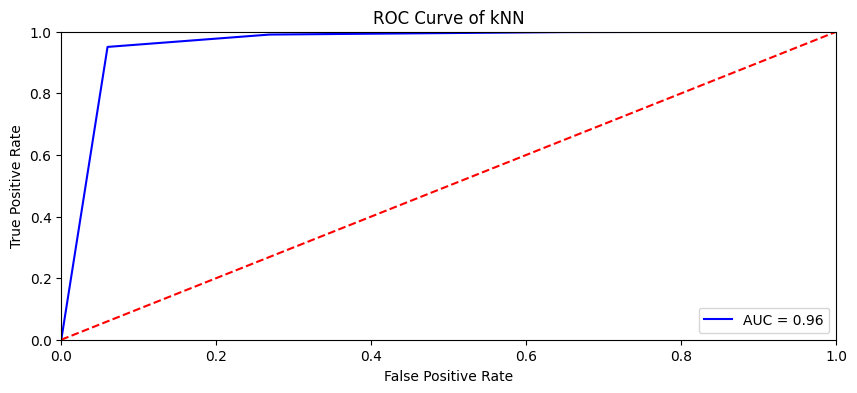

array(['No Holiday', 'No Holiday', 'No Holiday', ..., 'No Holiday',
       'No Holiday', 'No Holiday'], dtype=object)

In [23]:
print_error_rate(data, 'Holiday')
knn_classification(data, 'Holiday', 3)

# K-Means Clustering
Il K-Means Clustering è un algoritmo di apprendimento non supervisionato utilizzato per suddividere un insie,e di dati in gruppo o cluster basati sulle caratteristiche dei dati. L'obiettivo è di raggruppare punti di dati simili insieme e separare quelli diversi. L'algoritmo funziona in modo iterativo per assegnare punti di dati a cluster in modo che la somma dei quadrati delle distanze tra i punti dati e il centro del cluster più vicino sia minima. Ogni cluster è rappresentato da un centroide, che è il _centro_ del cluster, e i punti dati sono assegnati al cluster con il centroide più vicino.

**Codice:** Funzione che implementa l'algoritmo K-Means su un DataFrame fornito come parametro _dataframe_. L'utente specifica il numero di cluster _n_clusters_ da creare e le caratteristiche _feature1_ e _feature2_ del DataFrame da utilizzare per il clustering. È possibile specificare un seed per la riproducibilità dei risultati. La funzione calcola i centroidi dei cluster, assegna etichette di cluster ai punti di dati e visualizza il risultato del clustering utilizzando un diagramma a dispersione. Infine stampa informazioni utili come i _centroidi ottenuti_, le _etichette dei cluster_, la _somma dei quadrati delle distanze_ e il _numero di iterazioni_ effettuate durante l'esecuzione dell'algoritmo.

Numero di cluster: 1
Somma quadrati distanze: 3645184086.8082023
Numero di iterazioni: 2

Numero di cluster: 2
Somma quadrati distanze: 1074559764.674103
Numero di iterazioni: 9

Numero di cluster: 3
Somma quadrati distanze: 465325388.76934034
Numero di iterazioni: 11

Numero di cluster: 4
Somma quadrati distanze: 281574008.82467645
Numero di iterazioni: 6

Numero di cluster: 5
Somma quadrati distanze: 193133141.10134205
Numero di iterazioni: 21

Numero di cluster: 6
Somma quadrati distanze: 147958429.1327669
Numero di iterazioni: 27

Numero di cluster: 7
Somma quadrati distanze: 104803846.2326903
Numero di iterazioni: 45

Numero di cluster: 8
Somma quadrati distanze: 81979175.12450704
Numero di iterazioni: 19

Numero di cluster: 9
Somma quadrati distanze: 64533444.12097801
Numero di iterazioni: 13

Numero di cluster: 10
Somma quadrati distanze: 50150490.19259894
Numero di iterazioni: 7



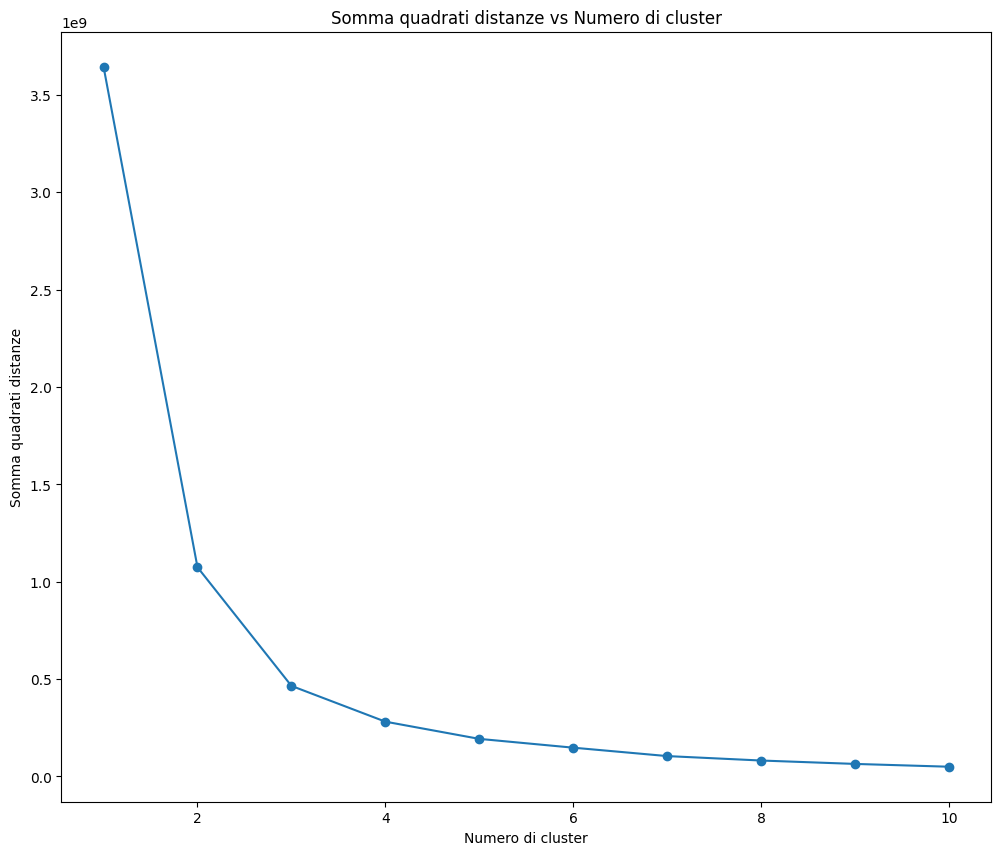

In [26]:
from sklearn.cluster import KMeans
def plot_cluster_evaluation(dataframe, max_clusters, feature1, feature2, seed=1234):
    data = dataframe[[feature1, feature2]].to_numpy()
    inertia_values = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
        
        print('Numero di cluster:', n_clusters)
        print('Somma quadrati distanze:', kmeans.inertia_)
        print('Numero di iterazioni:', kmeans.n_iter_)
        print()
    
    # Plot della somma dei quadrati delle distanze rispetto al numero di cluster
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
    plt.xlabel('Numero di cluster')
    plt.ylabel('Somma quadrati distanze')
    plt.title('Somma quadrati distanze vs Numero di cluster')
    plt.show()

plot_cluster_evaluation(df, 10, 'Temperature(°C)', 'Rented Bike Count')

Centroidi ottenuti:
 [[ 195.33897508    5.88899859]
 [1321.47647449   20.82094102]
 [2170.33971903   23.32081737]
 [ 744.2899729    17.21933153]]
Labels:
 [0 0 0 ... 3 3 3]
Somma quadrati distanze: 281574008.825
Numero di iterazioni: 6


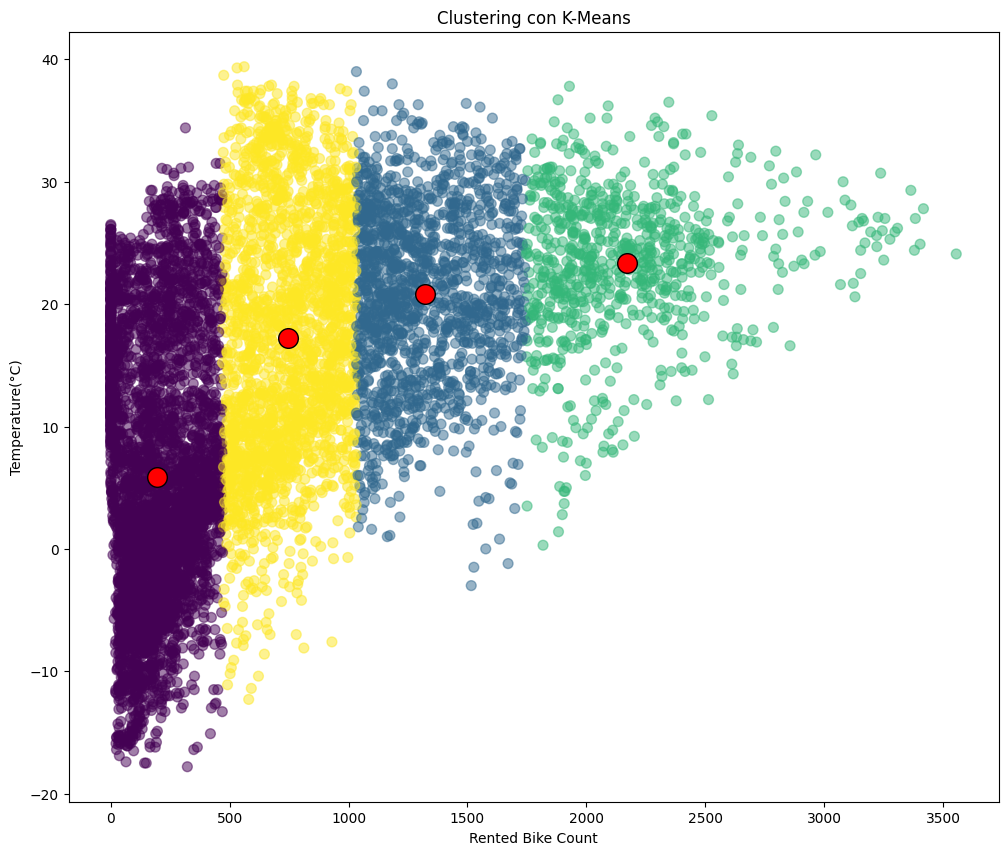

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
def k_means_clustering(dataframe, n_clusters, feature1, feature2, seed=1234):
    #seed = np.random.randint(0, 2147483647)
    data = dataframe[[feature1, feature2]].to_numpy()
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
    
    kmeans.fit(data)
    print('Centroidi ottenuti:\n', kmeans.cluster_centers_)
    print('Labels:\n', kmeans.labels_)
    print('Somma quadrati distanze: %0.3f' % kmeans.inertia_)
    print('Numero di iterazioni:', kmeans.n_iter_)
    
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=200, edgecolors='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Clustering con K-Means')
    plt.show()

k_means_clustering(df, 4, 'Rented Bike Count', 'Temperature(°C)')